## Day 21 - Someone get this man to his flowers

In [25]:
with open("./example.txt") as f:
    example_lines = [line.strip() for line in f.readlines()]

with open("./input.txt") as f:
    input_lines = [line.strip() for line in f.readlines()]

example_lines

['...........',
 '.....###.#.',
 '.###.##..#.',
 '..#.#...#..',
 '....#.#....',
 '.##..S####.',
 '.##..#...#.',
 '.......##..',
 '.##.#.####.',
 '.##..##.##.',
 '...........']

**Part 1: How many flowerplots can he visit with a 64 step path?**

In [26]:
from collections import deque
from copy import deepcopy

def part1(lines: list[str], num_steps: int = 64) -> int:
    grid = [[*line] for line in lines]
    
    for r, row in enumerate(grid):
        for c, col in enumerate(row):
            if col == ".":
                grid[r][c] = 1
            elif col == "S":
                sr, sc  = (r, c)
                grid[r][c] = 1
            else:
                assert col == "#", col
                grid[r][c] = 0

    # (step_count, r, c)
    q = deque([(0, sr, sc)])
    next_q = deque([])

    seen = {(0, sr, sc)}
    for _ in range(num_steps):
        while q:
            steps, r, c = q.popleft()
            steps += 1

            for dr, dc in [(0, 1), (0, -1), (1, 0), (-1,0)]:
                nr = r + dr
                nc = c + dc
                if 0 <= nr < len(grid) and 0 <= nc < len(grid[0]):
                    if grid[nr][nc] and (steps, nr, nc) not in seen:
                        next = (steps, nr, nc)
                        seen.add(next)
                        next_q.append(next)
        q = deepcopy(next_q)
        next_q = deque([])
    
    unique_positions = {
        (r, c) for (_, r, c) in q
    }
    return len(unique_positions)

assert part1(example_lines, 6) == 16
part1(input_lines)

3660

**Part 2: ACtually the grid is infinite and we have to do 26501365 :)**

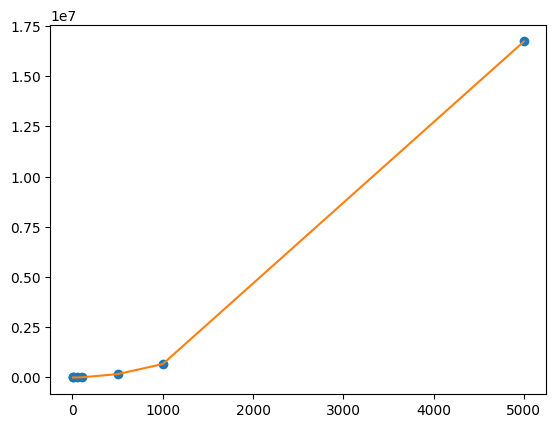

In [27]:
from matplotlib import pyplot

pyplot.plot([6, 10, 50, 100, 500, 1000, 5000], [16, 50, 1594, 6536, 167004, 668697, 16733044], "o")

pyplot.plot([6, 10, 50, 100, 500, 1000, 5000], [16, 50, 1594, 6536, 167004, 668697, 16733044], "-")

You get the feeling having a list of the possible plots or seen plots is not going to work lol

Idea: cache what happens on from being at a point in the grid.

- So when we step into a 'new' grid, we're essentially wrapping around to the original but like it's a unique spot

Let's find all the patterns from each starting point in the grid maybe idk

maybe we could just go 'outwards' and note the fact you can just hop back and forth forever for each visited, so every single place visited except for the penultimate is added...

In [28]:
from heapq import heappush, heappop

def part2(lines: list[str]) -> int:
    grid = [[*line] for line in lines]
    
    for r, row in enumerate(grid):
        for c, col in enumerate(row):
            if col == ".":
                grid[r][c] = 1
            elif col == "S":
                sr, sc  = (r, c)
                grid[r][c] = 1
            else:
                assert col == "#", col
                grid[r][c] = 0


    possible_outer_starts = [
                        (r, c)
                        for r, row in enumerate(grid)
                        for c in range(len(row))
                        if grid[r][c] and (r in [0, len(grid)-1] or c in [0, len(grid[0]) - 1])
                    ]
    
    # steps_to_reach_outer_locs = {
    #     loc: 0 for loc in possible_outer_starts
    # }

    gardens = tuple(
        (r, c)
        for r, row in enumerate(grid)
        for c in range(len(row))
        if grid[r][c]
    )

    steps_to_reach_gardens = {
        loc: 0 for loc in gardens
    }

    def distance_to_target(r: int, c: int, rt: int, ct: int):
        return abs(r-rt) + abs(c - ct)
    
    return 0
    for tr, tc in gardens:
        print(tr, tc)
        initial_distance = distance_to_target(sr, sc, tr, tc)

        # (distance, step_count, r, c)
        q = [(initial_distance, 0, sr, sc)]

        while False:
            dist, steps, r, c = heappop(q)

            if (r,c) == (tr, tc) and steps > 0:
                steps_to_reach_gardens[(r,c)] = steps
                break

            steps += 1

            for dr, dc in [(0, 1), (0, -1), (1, 0), (-1,0)]:
                nr = r + dr
                nc = c + dc
                if 0 <= nr < len(grid) and 0 <= nc < len(grid[0]):
                    if grid[nr][nc]:
                        dist = distance_to_target(nr, nc, tr, tc)
                        heappush(q, (dist, steps, nr, nc))
    
    return (steps_to_reach_gardens)




part2(example_lines)

0

I give up, Neutrino's answer looks insane, as below. If I understand after vid maybe I'll try do myself but idk. Takes the pressure off finishing this year if I skip anyway

In [31]:
grid = input_lines

sr, sc = next((r, c) for r, row in enumerate(grid) for c, ch in enumerate(row) if ch == "S")

assert len(grid) == len(grid[0])

size = len(grid)
steps = 26501365

assert sr == sc == size // 2
assert steps % size == size // 2

def fill(sr, sc, ss):
    ans = set()
    seen = {(sr, sc)}
    q = deque([(sr, sc, ss)])

    while q:
        r, c, s = q.popleft()

        if s % 2 == 0:
            ans.add((r, c))
        if s == 0:
            continue

        for nr, nc in [(r + 1, c), (r - 1, c), (r, c + 1), (r, c - 1)]:
            if nr < 0 or nr >= len(grid) or nc < 0 or nc >= len(grid[0]) or grid[nr][nc] == "#" or (nr, nc) in seen:
                continue
            seen.add((nr, nc))
            q.append((nr, nc, s - 1))
    
    return len(ans)

grid_width = steps // size - 1

odd = (grid_width // 2 * 2 + 1) ** 2
even = ((grid_width + 1) // 2 * 2) ** 2

odd_points = fill(sr, sc, size * 2 + 1)
even_points = fill(sr, sc, size * 2)

corner_t = fill(size - 1, sc, size - 1)
corner_r = fill(sr, 0, size - 1)
corner_b = fill(0, sc, size - 1)
corner_l = fill(sr, size - 1, size - 1)

small_tr = fill(size - 1, 0, size // 2 - 1)
small_tl = fill(size - 1, size - 1, size // 2 - 1)
small_br = fill(0, 0, size // 2 - 1)
small_bl = fill(0, size - 1, size // 2 - 1)

large_tr = fill(size - 1, 0, size * 3 // 2 - 1)
large_tl = fill(size - 1, size - 1, size * 3 // 2 - 1)
large_br = fill(0, 0, size * 3 // 2 - 1)
large_bl = fill(0, size - 1, size * 3 // 2 - 1)

# print(
#     odd * odd_points +
#     even * even_points +
#     corner_t + corner_r + corner_b + corner_l +
#     (grid_width + 1) * (small_tr + small_tl + small_br + small_bl) +
#     grid_width * (large_tr + large_tl + large_br + large_bl)
# )